In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss

In [7]:
import pandas as pd
data = pd.read_csv('C:/Users/82106/Desktop/제주도 과일 공모전/data/train.csv')
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [8]:
data.tail()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0
59396,RD_F_J_20230303,2023-03-03,RD,F,J,427520.0,529.0


In [9]:
data['item'].value_counts()

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [10]:
data.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

<AxesSubplot:xlabel='item', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


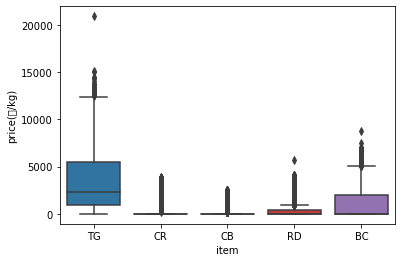

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='corporation', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


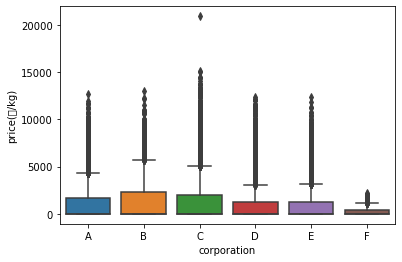

In [13]:
sns.boxplot(x='corporation',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='location', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


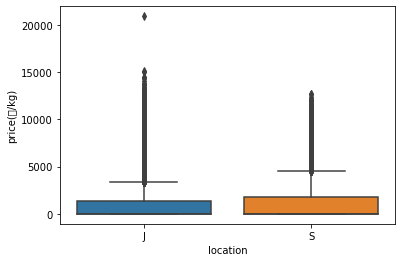

In [16]:
sns.boxplot(x='location',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


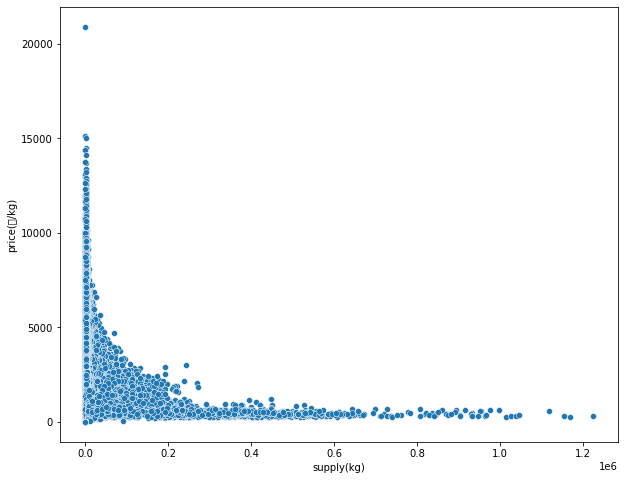

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='supply(kg)',y='price(원/kg)')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


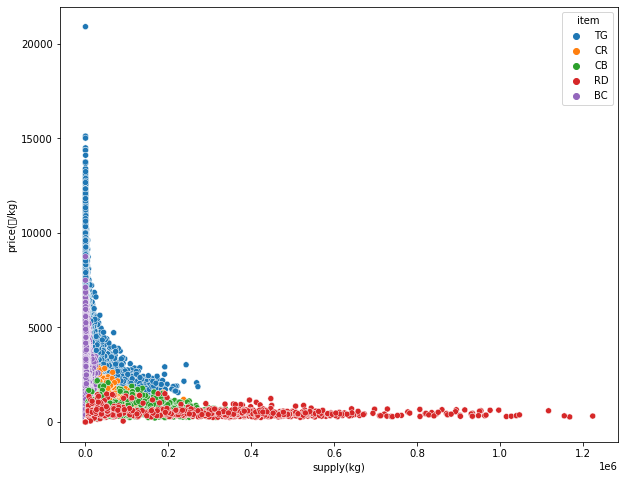

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='supply(kg)',y='price(원/kg)',hue='item')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


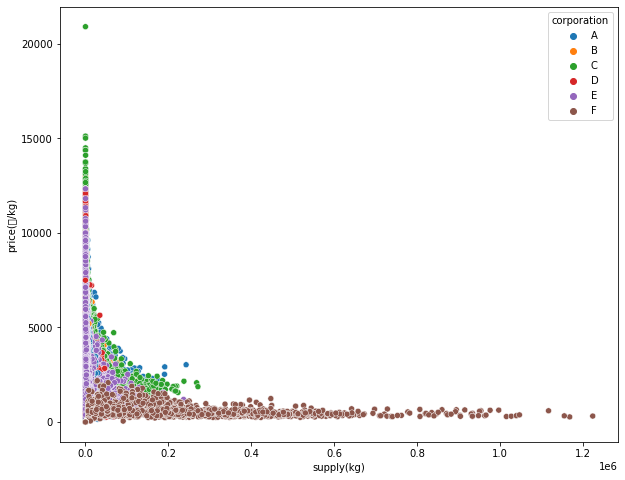

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='supply(kg)',y='price(원/kg)',hue='corporation')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


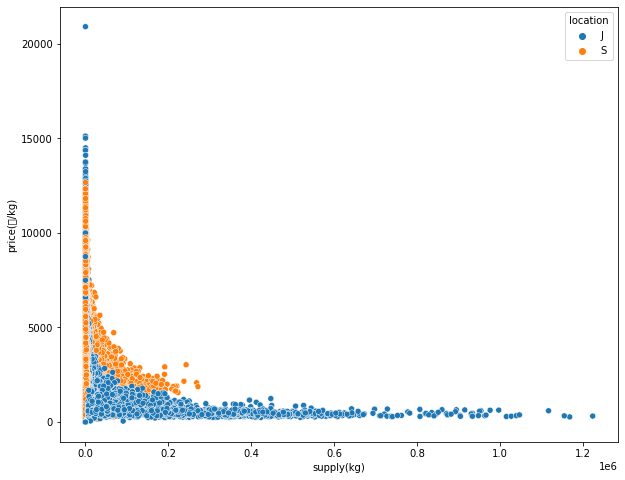

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='supply(kg)',y='price(원/kg)',hue='location')

C:\Users\82106\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\82106\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x576 with 0 Axes>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


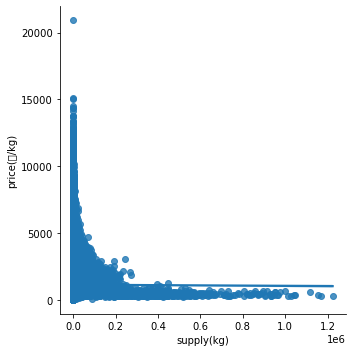

In [22]:
plt.figure(figsize=(10,8))
sns.lmplot(data=data,x ='supply(kg)',y='price(원/kg)')

In [23]:
data.groupby('location')['price(원/kg)'].sum()

location
J    37213110.0
S    30005327.0
Name: price(원/kg), dtype: float64

In [24]:
data.groupby('corporation')['price(원/kg)'].sum()

corporation
A    15649343.0
B    11763166.0
C    13418396.0
D    12490909.0
E    13107338.0
F      789285.0
Name: price(원/kg), dtype: float64

In [25]:
data[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [27]:
import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [28]:
type(data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


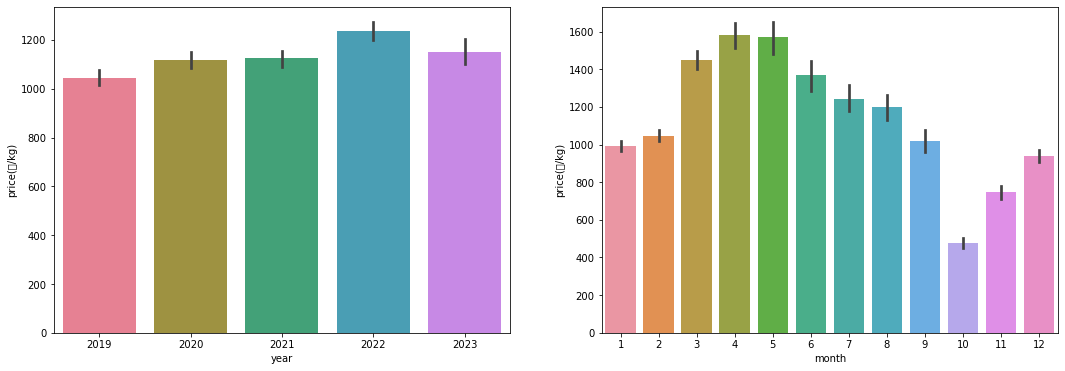

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=data,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=data,x='month',y='price(원/kg)',ax=axes[1])

In [31]:
items = data['item'].value_counts().index.to_list()
items

['TG', 'BC', 'RD', 'CR', 'CB']

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


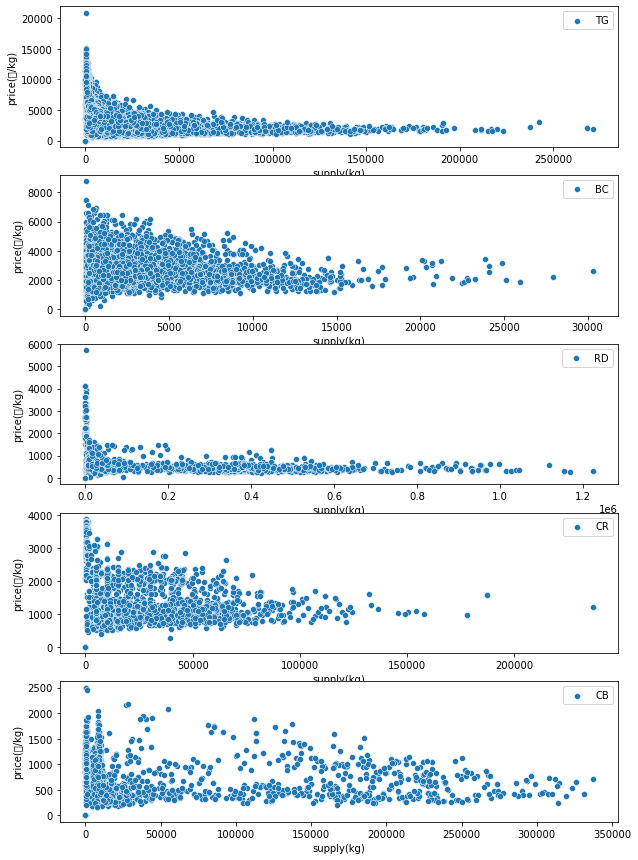

In [32]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = data[data['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])


In [33]:
corp = data['corporation'].value_counts().index.to_list()
corp

['A', 'E', 'D', 'C', 'B', 'F']

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


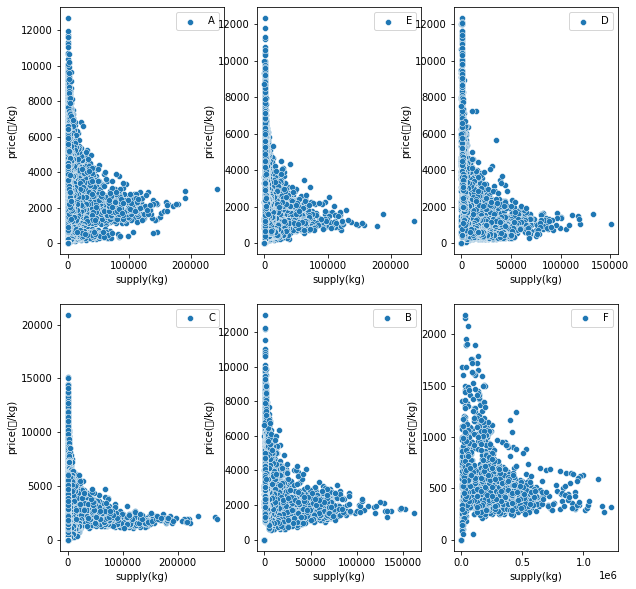

In [34]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = data[data['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])


In [35]:
loc = data['location'].value_counts().index.to_list()
loc

['J', 'S']

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


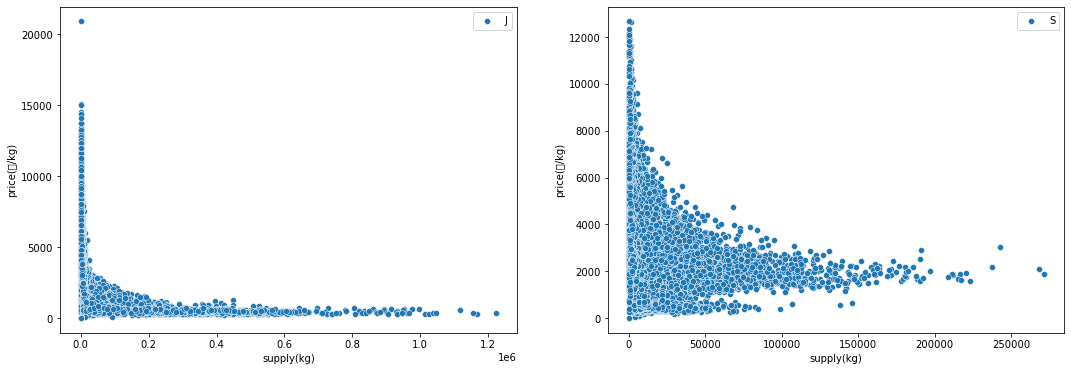

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = data[data['location']==loc[0]], x = 'supply(kg)',y='price(원/kg)',label=loc[0],ax = axes[0])
sns.scatterplot(data = data[data['location']==loc[1]], x = 'supply(kg)',y='price(원/kg)',label=loc[1],ax = axes[1])

In [37]:
data[data['supply(kg)']==0]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0,2019,1,6
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0,2019,1,13
19,TG_A_J_20190120,2019-01-20,TG,A,J,0.0,0.0,2019,1,20
...,...,...,...,...,...,...,...,...,...,...
59363,RD_F_J_20230129,2023-01-29,RD,F,J,0.0,0.0,2023,1,29
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0,2023,2,5
59377,RD_F_J_20230212,2023-02-12,RD,F,J,0.0,0.0,2023,2,12
59384,RD_F_J_20230219,2023-02-19,RD,F,J,0.0,0.0,2023,2,19


In [38]:
sup_notzero = data[data['supply(kg)']!=0]
sup_notzero 

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


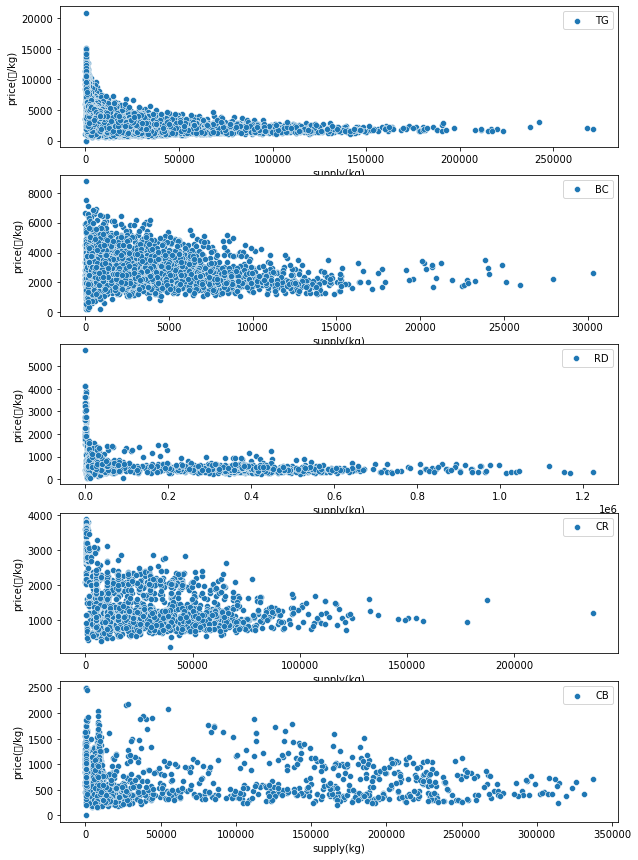

In [39]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = sup_notzero[sup_notzero['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

In [40]:
sup_notzero['item'].value_counts()

TG    11677
BC     4525
RD     4040
CR     2082
CB     1621
Name: item, dtype: int64

In [41]:
sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
sup_notzero['y-m']

C:\Users\82106\AppData\Local\Temp\ipykernel_23808\229828079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')


2        2019-01
3        2019-01
4        2019-01
6        2019-01
7        2019-01
          ...   
59392    2023-02
59393    2023-02
59394    2023-03
59395    2023-03
59396    2023-03
Name: y-m, Length: 23945, dtype: object

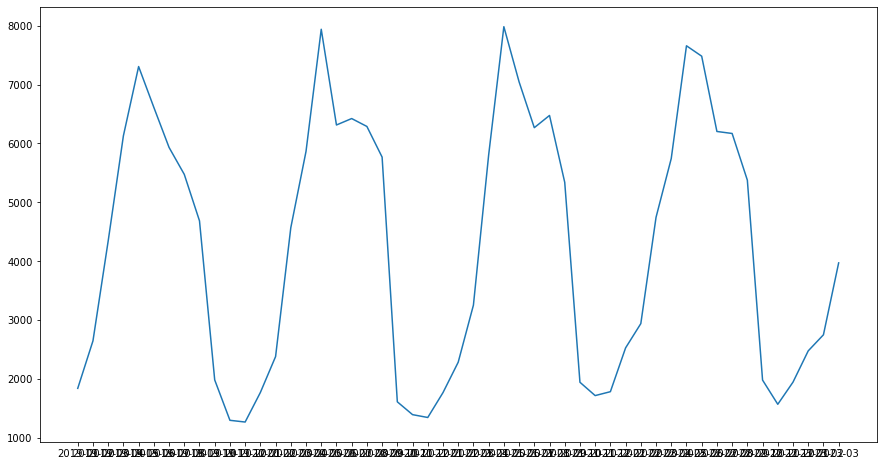

In [42]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'TG'].groupby(['y-m'])['price(원/kg)'].mean())

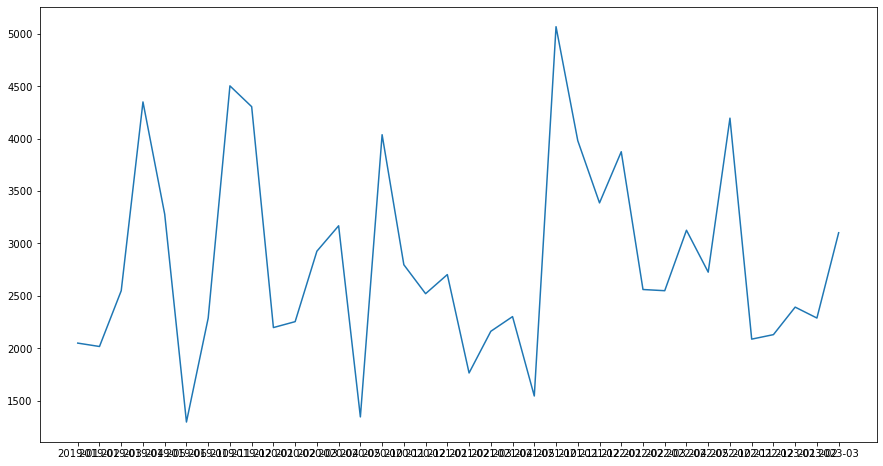

In [43]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'BC'].groupby(['y-m'])['price(원/kg)'].mean())

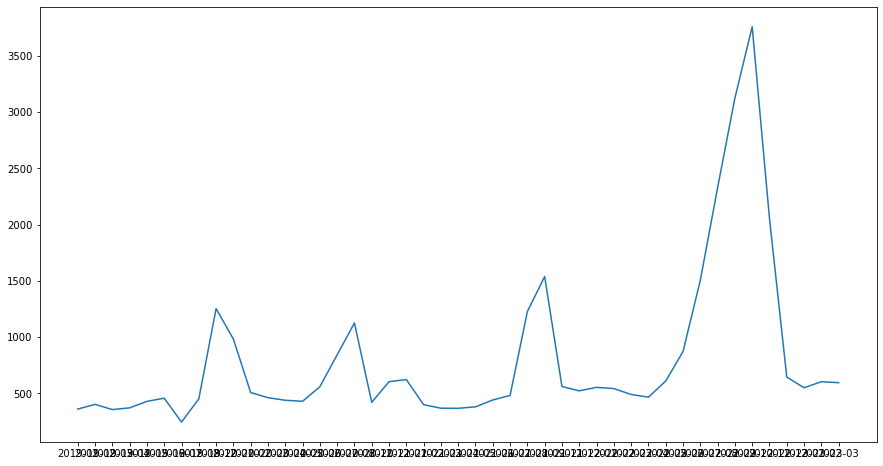

In [44]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'RD'].groupby(['y-m'])['price(원/kg)'].mean())

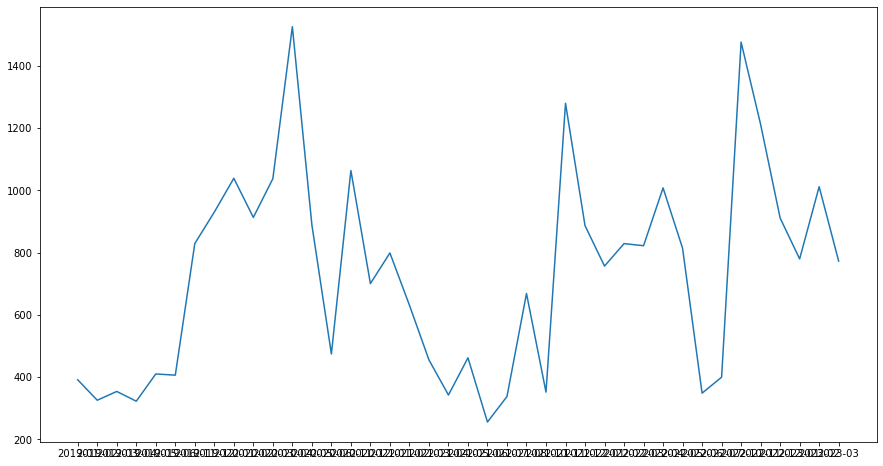

In [45]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'CB'].groupby(['y-m'])['price(원/kg)'].mean())

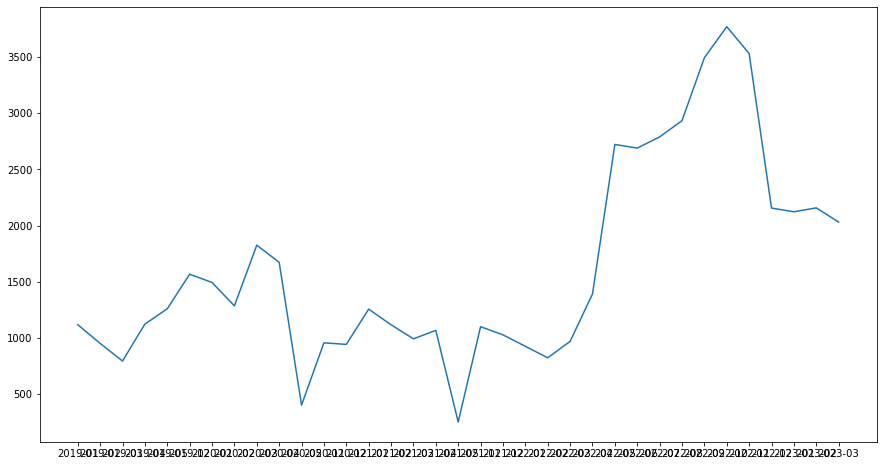

In [46]:
plt.figure(figsize=(15,8))
plt.plot(sup_notzero[sup_notzero['item'] == 'CR'].groupby(['y-m'])['price(원/kg)'].mean())

C:\Users\82106\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'all')

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


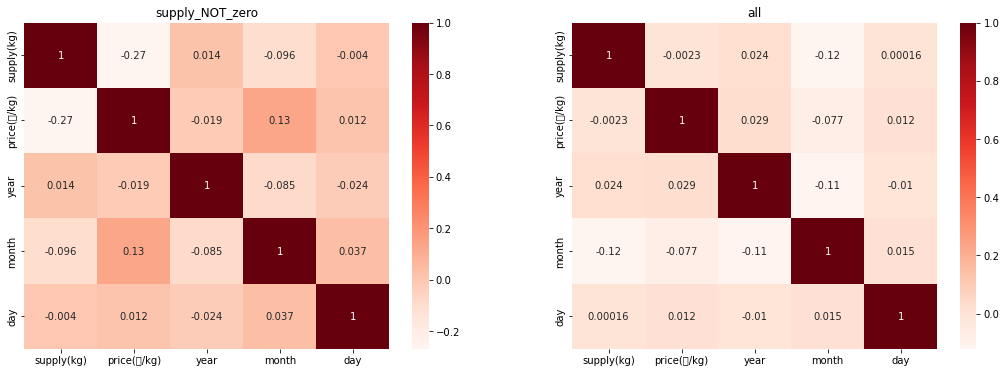

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(sup_notzero.corr(),annot=True,cmap='Reds',ax = axes[0])
axes[0].set_title('supply_NOT_zero')
sns.heatmap(data.corr(),annot=True,cmap='Reds',ax = axes[1])
axes[1].set_title('all')


C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


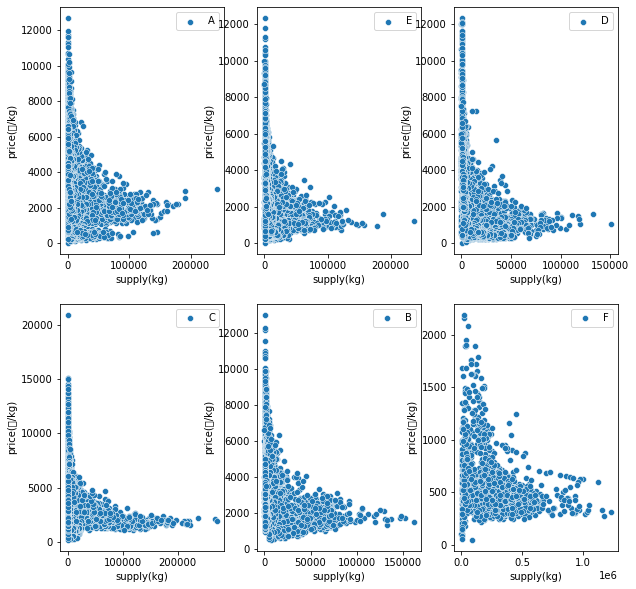

In [48]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = sup_notzero[sup_notzero['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])


<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


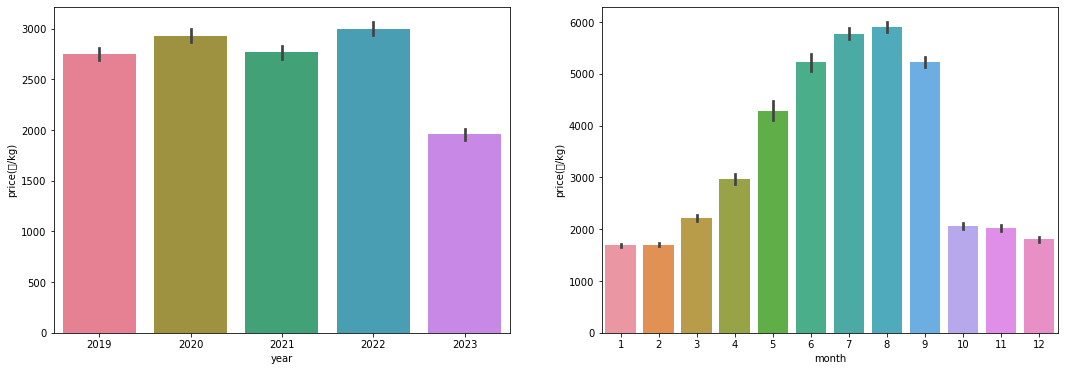

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=sup_notzero,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=sup_notzero,x='month',y='price(원/kg)',ax=axes[1])